<a href="https://colab.research.google.com/github/ramkumarravi49/Credit-card-Fraud-Detection/blob/main/Credit_Fraud_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [ ]:
# code
"""
Kaggle API setup
Credits: https://www.kaggle.com/general/74235
"""
!pip install kaggle

# Upload API details json file to colab
from google.colab import files
files.upload()

! mkdir ~/.kaggle    # create a Kaggle directory and move json files to there
! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json # change permissions of kaggle json file


# download our dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 86% 57.0M/66.0M [00:00<00:00, 97.1MB/s]
100% 66.0M/66.0M [00:00<00:00, 101MB/s] 


In [ ]:
! unzip /content/creditcardfraud.zip -d /content/

Archive:  /content/creditcardfraud.zip
  inflating: /content/creditcard.csv  


In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA


In [ ]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Null value elimination

In [ ]:
df_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['null']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'null'}, axis=1)
              .sort_values('null', ascending=True))
  xs = counted['null']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_missing_columns.sort_values('null', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('null')
_ = plt.ylabel('count()')

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
fraudfrac = len(fraud)/float(len(valid))

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))
print(fraudfrac)

Fraud Cases: 492
Valid Transactions: 284315
0.0017304750013189597


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("details of valid transaction")
valid.Amount.describe()


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

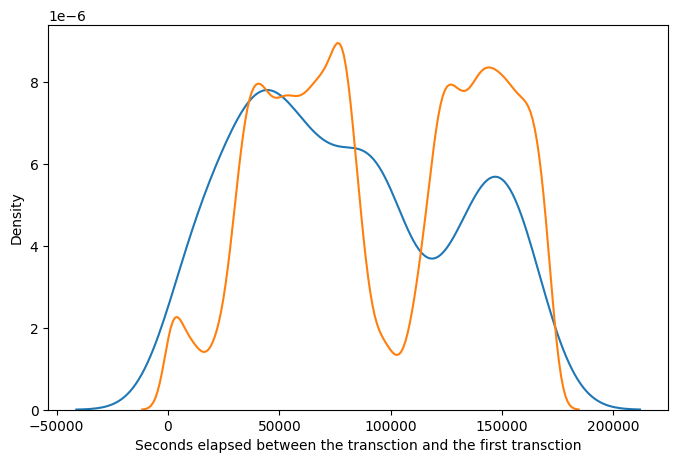

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(valid['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

# Test-Train-Split

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variables into X
X = data.drop(['Class'], axis=1)
# Putting target variable to y
y = data['Class']

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Feature Scaling

We need to scale Column ' AMOUNT ' as other columns have been scaled by PCA

Note: we do not sclae fit test data we oly fit train data and transform test data

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,134039.0,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,124044.0,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,54997.0,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,137226.0,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,136246.0,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [ ]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


# Skewness

we see that many variables are heavily skewd, we bring them into normal distribution

In [ ]:
# Listing the columns
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

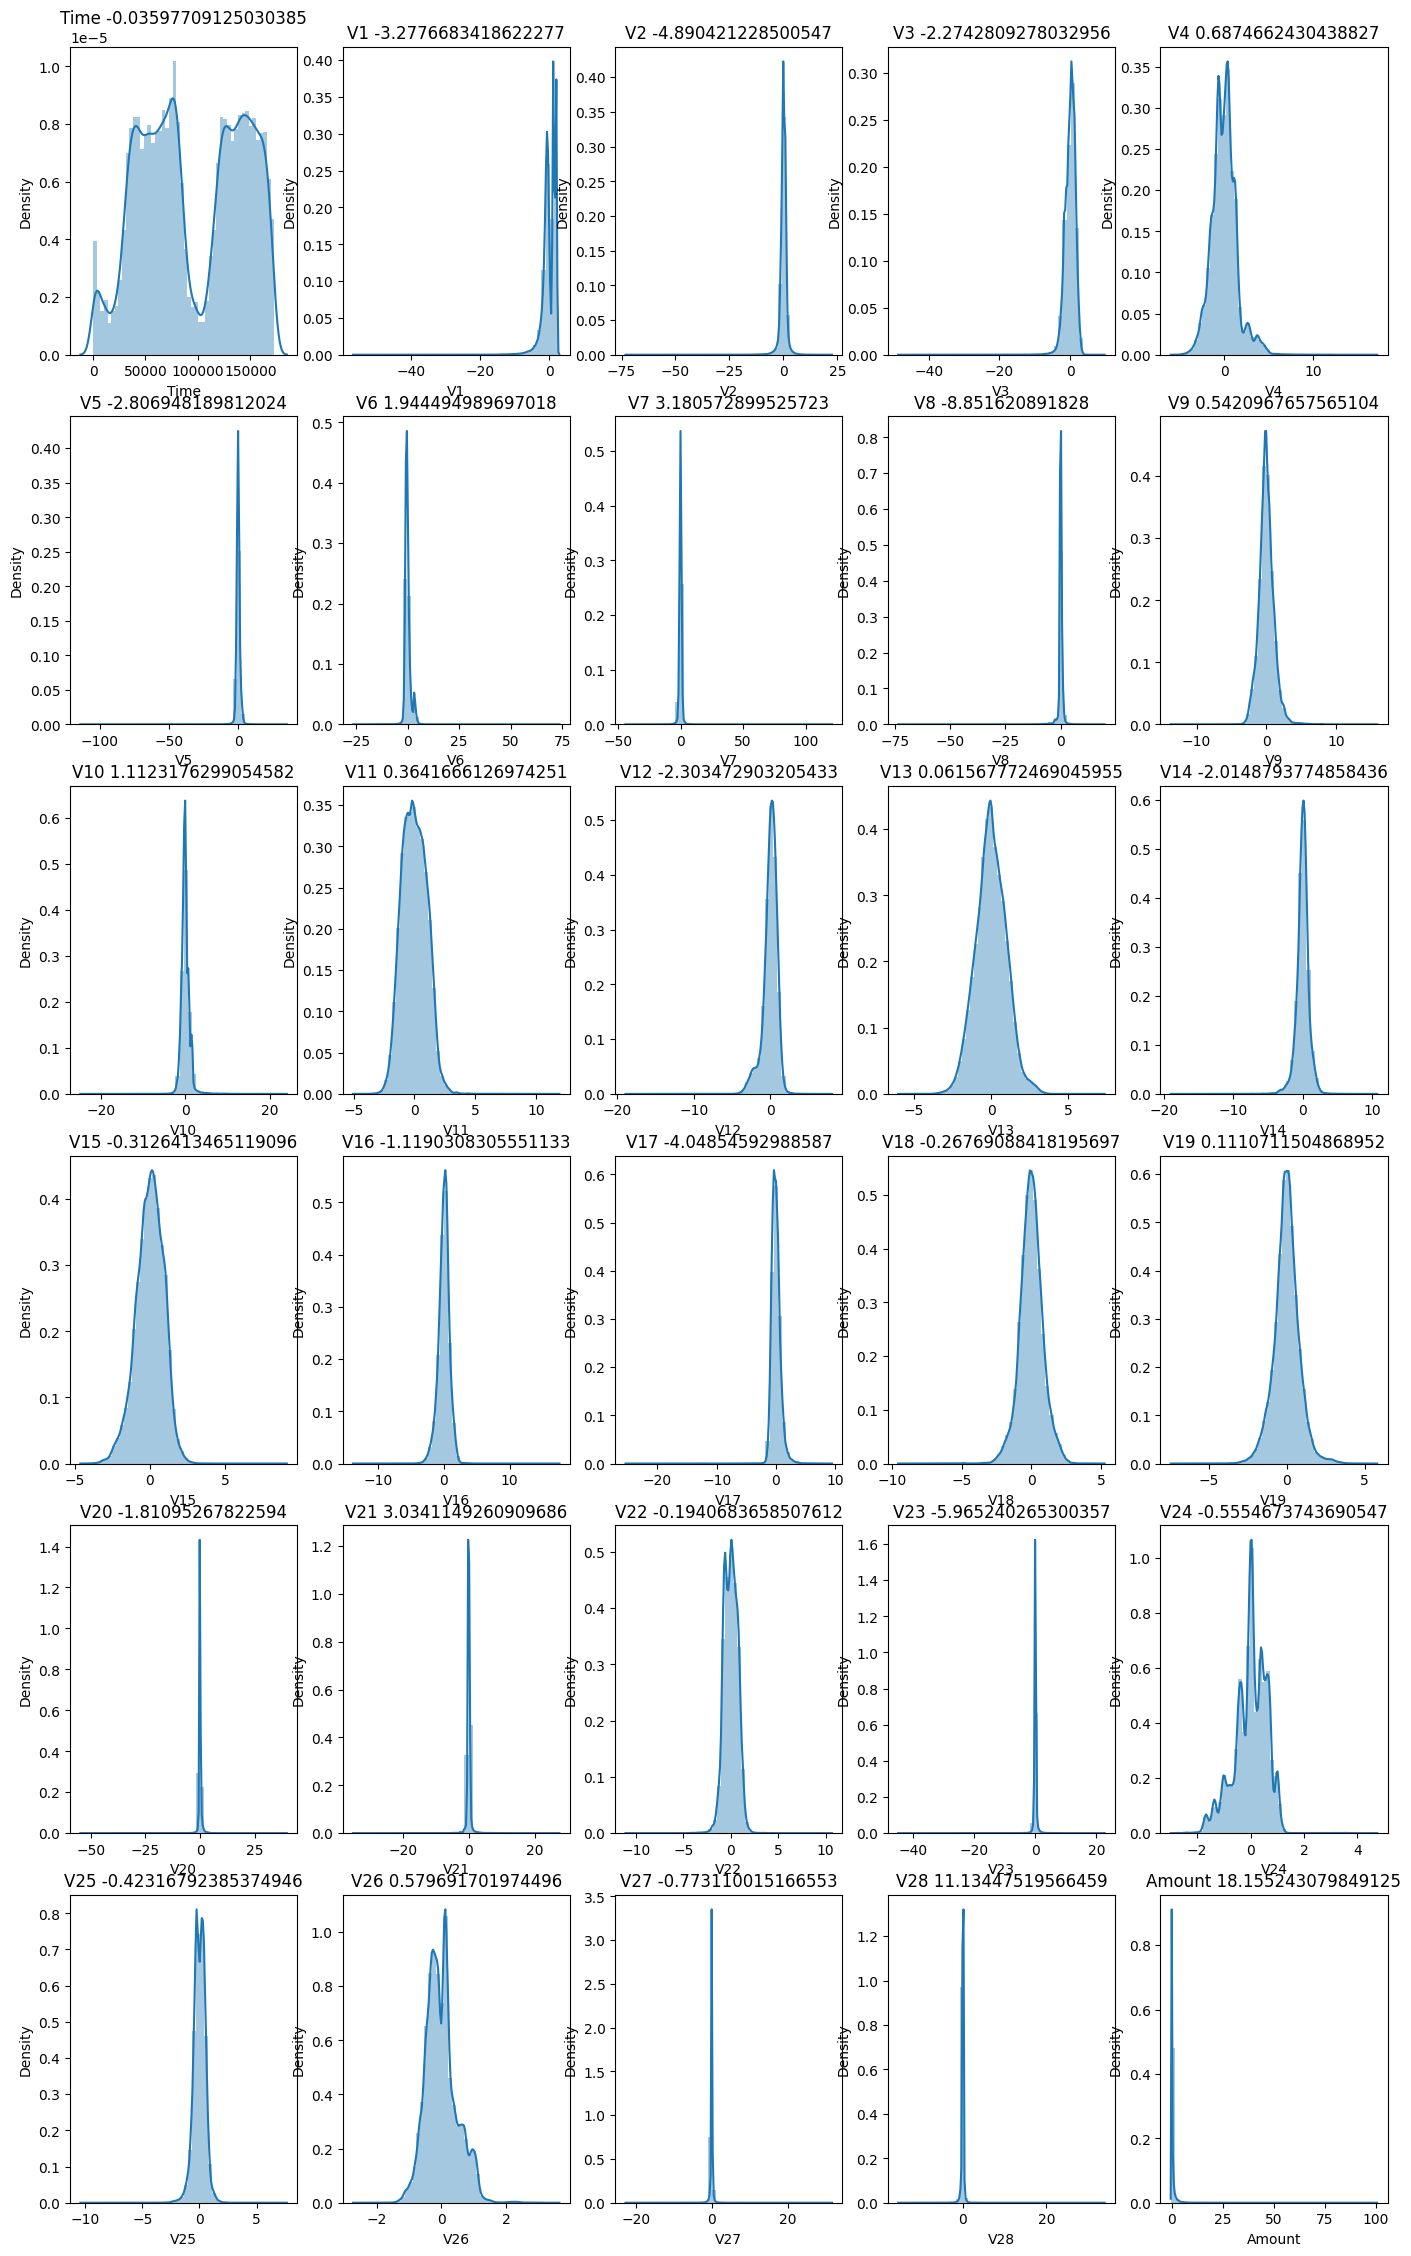

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

## Power tranformation

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

# Transform the test set
X_test[cols] = pt.transform(X_test)


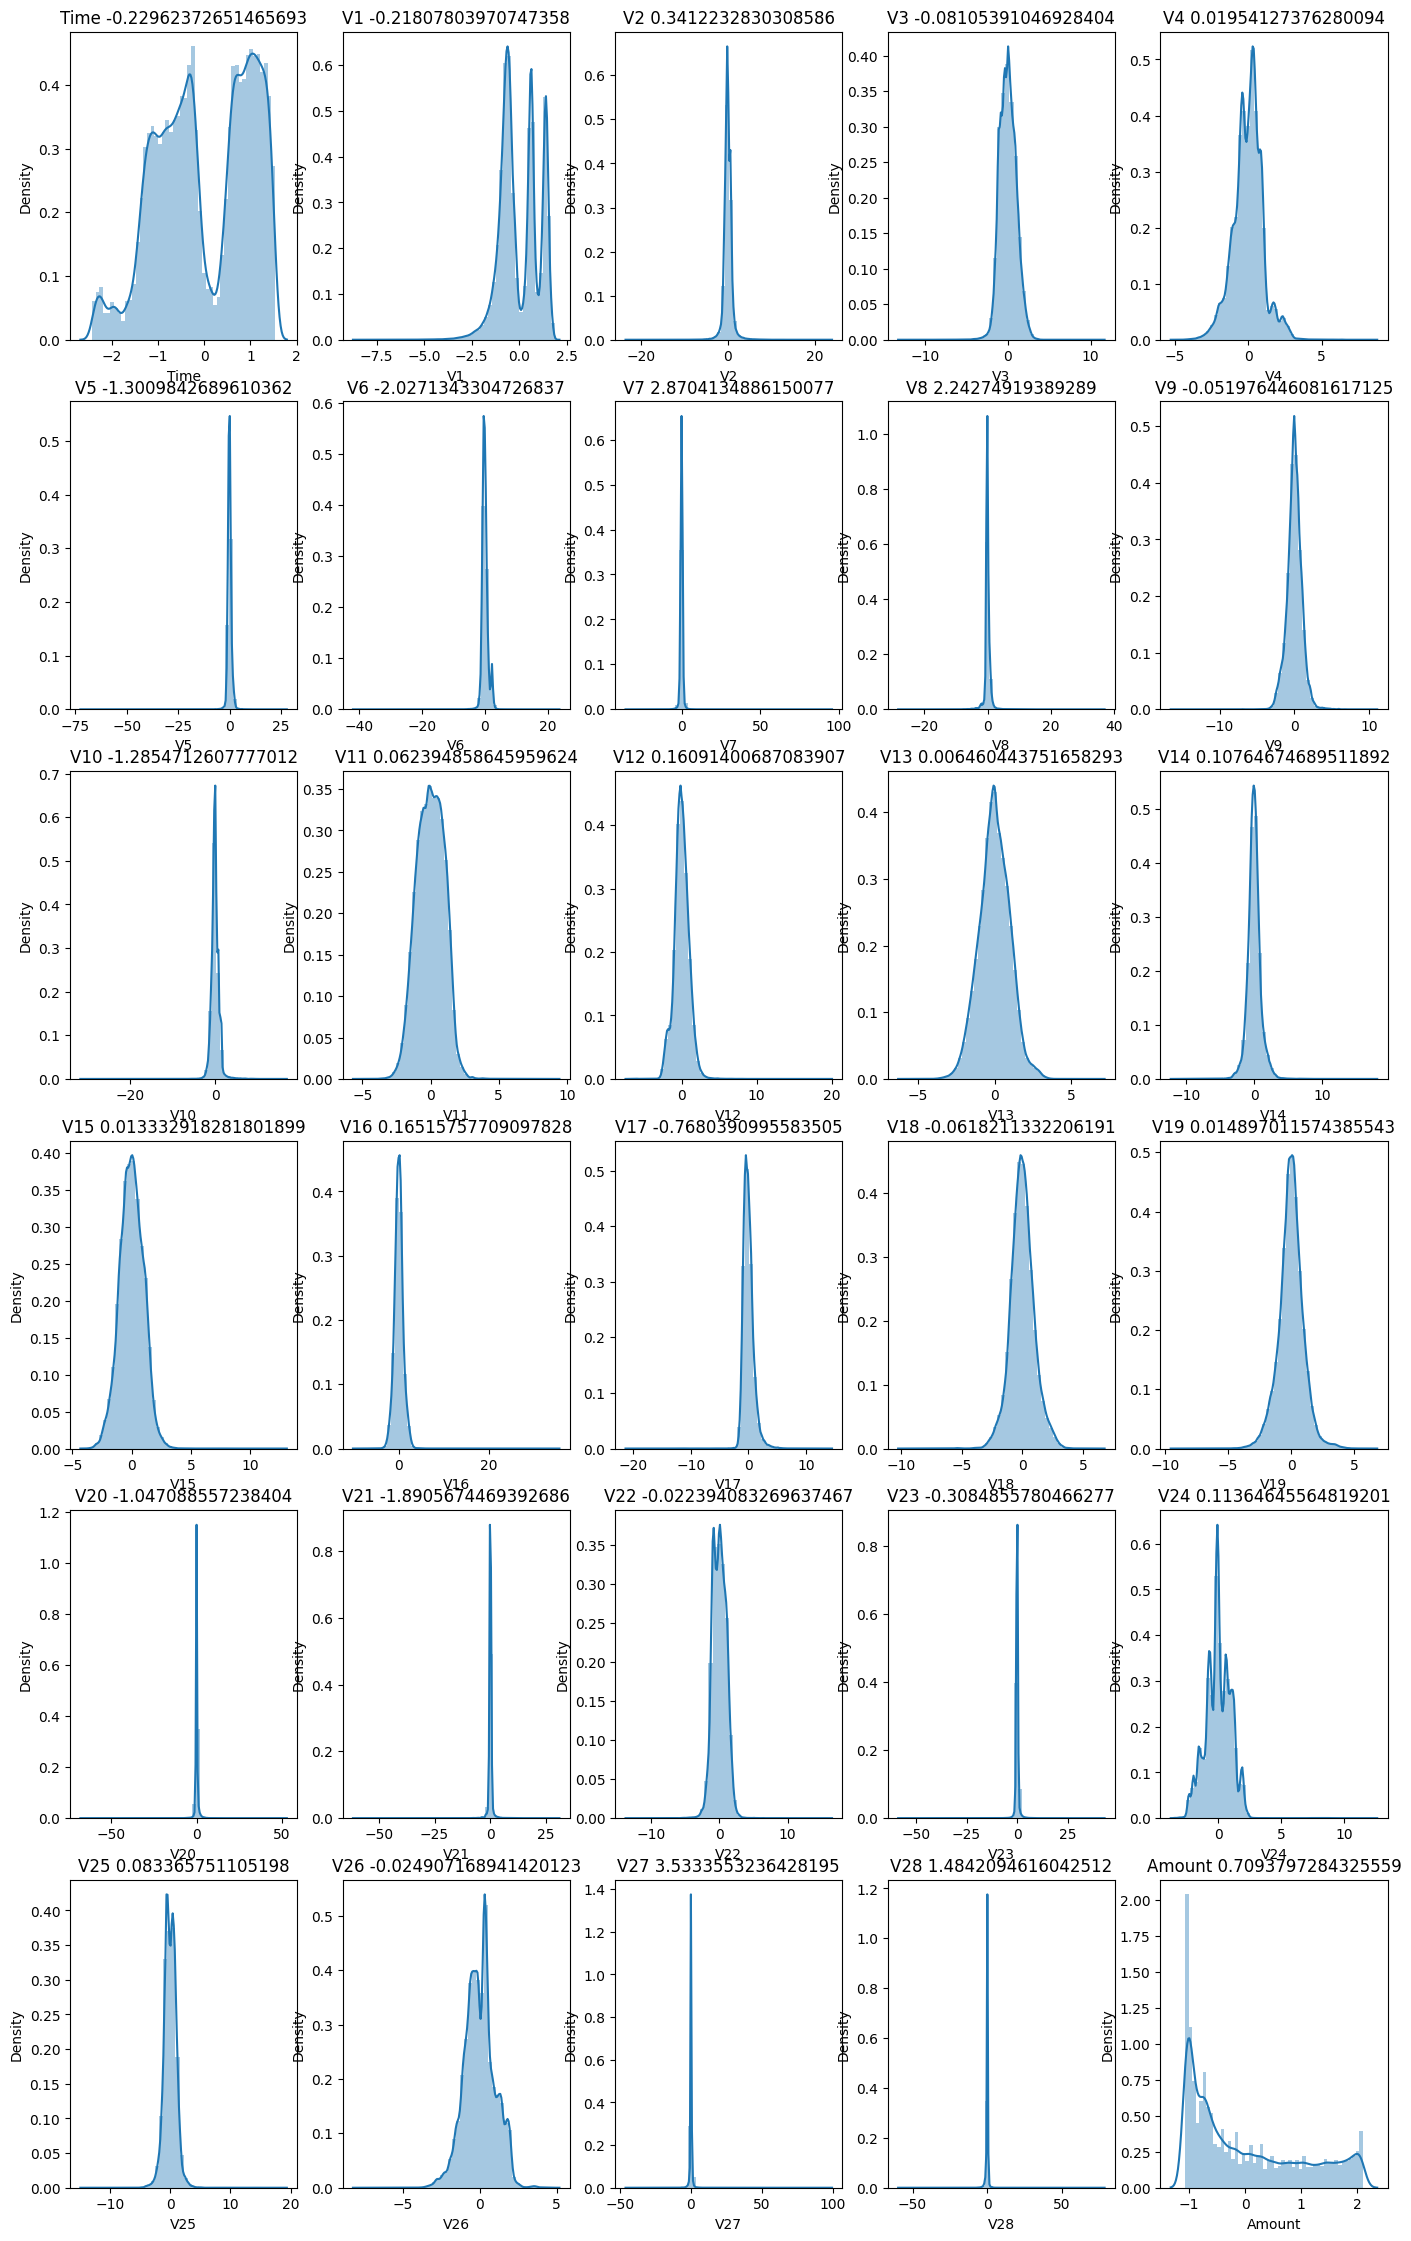

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

# model buliding for skewd data
 ## Metric selection for heavily imbalanced data
 As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

## Why SVM was not tried
In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

## Why KNN was not used
KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points.



# Logistic regression

In [ ]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Tuning Hyper-parameter
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.806021,0.022206,0.038701,0.010431,0.01,{'C': 0.01},0.986923,0.987267,0.968537,0.982467,0.993713,0.983781,0.008424,1,0.984132,0.984599,0.988502,0.985452,0.982973,0.985132,0.001866
1,1.629625,0.609834,0.068031,0.046636,0.1,{'C': 0.1},0.986361,0.987820,0.961151,0.980400,0.992326,0.981611,0.010918,2,0.982406,0.983814,0.988072,0.984156,0.981295,0.983948,0.002301
2,1.279831,0.102487,0.032482,0.001351,1,{'C': 1},0.986199,0.987685,0.958366,0.979495,0.991575,0.980664,0.011812,3,0.981605,0.983304,0.987652,0.983466,0.980611,0.983328,0.002411
3,2.003913,0.470291,0.052981,0.017136,10,{'C': 10},0.986179,0.987669,0.958011,0.979393,0.991485,0.980547,0.011927,4,0.981504,0.983236,0.987592,0.983376,0.980525,0.983246,0.002423
4,1.301824,0.096673,0.032444,0.001861,100,{'C': 100},0.986177,0.987666,0.957979,0.979379,0.991478,0.980536,0.011938,5,0.981494,0.983229,0.987587,0.983366,0.980516,0.983238,0.002424
5,1.605497,0.354896,0.037403,0.010638,1000,{'C': 1000},0.986176,0.987665,0.957976,0.979378,0.991477,0.980535,0.011938,6,0.981493,0.983228,0.987586,0.983366,0.980515,0.983238,0.002424


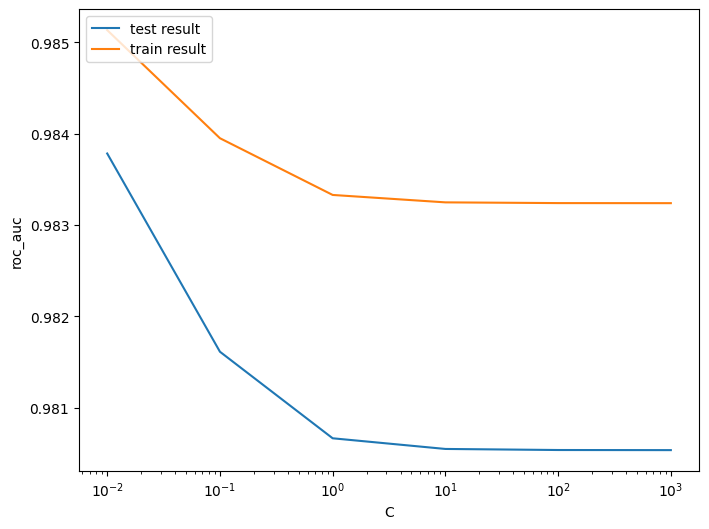

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837811907775487 at C = 0.01


### Log Reg with best c

In [ ]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [ ]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

## Train Set Prediciton

In [ ]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[227427     22]
 [   135    261]]


In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



### ROC

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

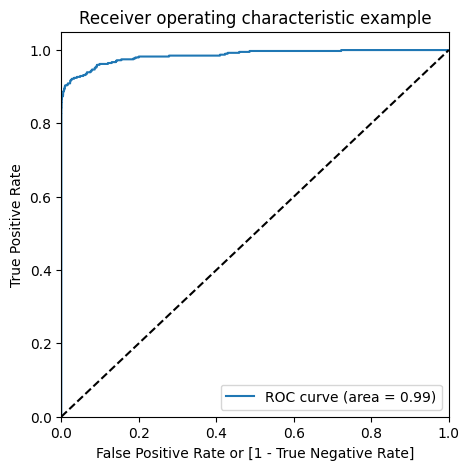

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

## Test Set Prediciton

In [ ]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[56850    16]
 [   42    54]]


In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385543


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

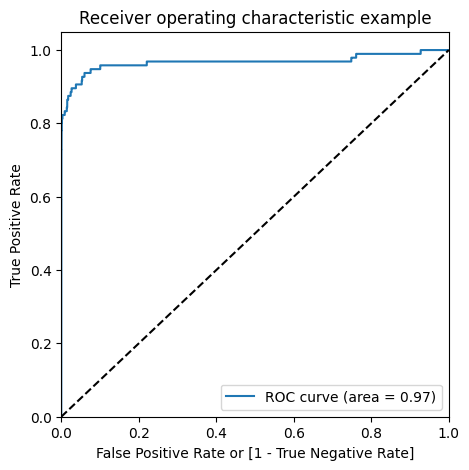

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

Model summary

### Train set
- Accuracy = 0.99
- Sensitivity = 0.70
- Specificity = 0.99
- F1-Score = 0.76
- ROC = 0.99

### Test set
- Accuracy = 0.99
- Sensitivity = 0.77
- Specificity = 0.99
- F1-Score = 0.65
- ROC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.